# 02805 week6 exercise
s202997 Nina Weng

## Part 1: A little lecture

(no exercise at this part)

## Part 2: Installing and the basics

> Exercises: NLPP Chapter 1.
> 
> - First, install nltk if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> - Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. It becomes much more fun if you to add a few variations and see what happens. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a notebook.

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

> \*Exercises: NLPP Chapter 1 (the stuff that might be due in an upcoming assignment).
>
> The following exercises from Chapter 1 are what might be due in an assignment later on.
> 
> - Try out the concordance method, using another text and a word of your own choosing.
> - Also try out the similar and common_context methods for a few of your own examples.
> - Create your own version of a dispersion plot ("your own version" means another text and different word).
> - Explain in your own words what aspect of language lexical diversity describes.
> - Create frequency distributions for text2, including the cumulative frequency plot for the 75 most common words.
> - What is a bigram? How does it relate to collocations. Explain in your own words.
> - Work through ex 2-12 in NLPP's section 1.8.
> - Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8.

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


> - Try out the concordance method, using another text and a word of your own choosing.

In [3]:
text7.concordance("stock")

Displaying 25 of 172 matches:
.75 *U* , off 25 cents , in New York Stock Exchange composite trading . Norman 
istrative nightmare . '' In New York Stock Exchange composite trading yesterday
 of the spinoff caused Cray Research stock to jump $ 2.875 *U* yesterday *-1 to
*-1 to close at $ 38 *U* in New York Stock Exchange composite trading . Analyst
. `` Cray Computer will be a concept stock , '' he said *T*-1 . `` You either b
 it owns 33 % of Moleculon 's voting stock and has an agreement * to acquire an
ether with its convertible preferred stock holdings , gives Faulding the right 
erest to 70 % of Moleculon 's voting stock . Oil production from Australia 's B
US$ 13.73 *U* -RRB- . On the Toronto Stock Exchange yesterday , Magna shares cl
 investors have turned away from the stock market over the years , securities f
e than the broader market . When the stock market dropped nearly 7 % Oct. 13 *T
hares are traded *-1 on the New York Stock Exchange . The stocks of banking con
r among in

> - Also try out the similar and common_context methods for a few of your own examples.

In [4]:
text1.similar("crazy")

old dark natural him all mildly you is which that rolling poor whales
but say there day indian open might


In [5]:
text5.similar("crazy")

back wrong room same other main


In [6]:
text7.similar("easy")

said trying seeking subject able going allowed willing interesting was
used reported likely about expected other but thought open time


In [7]:
text7.common_contexts(["said", "easy"])
# the meaning of the function common_contexts
# is said to / be said to / is easy to / be easy to

is_to be_to


In [8]:
text2.common_contexts(["said", "easy"])

and_, was_.


> - Create your own version of a dispersion plot ("your own version" means another text and different word).

In [9]:
# get the text from wikipedia : Case_Closed
import requests

kwords = 'Case_Closed'

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"
title = "titles={}".format(kwords)

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
r = requests.get(query)
text= r.text

txt_path = './file/Case_Closed.txt'
with open(txt_path, 'w') as f:
    f.write(text)

In [10]:
txt_path = './file/Case_Closed.txt'
with open(txt_path, 'r') as f:
    text = f.read()

# get the most
import re
words = re.sub(r'[^a-zA-Z0-9-]+',' ',text)
import collections
counts = collections.Counter(words.split(' '))
counts = sorted(counts.items(),key = lambda item:item[1],reverse= True)

In [11]:
# import nltk    
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# text_tokens = word_tokenize(text)

# from tqdm import tqdm
# tokens_without_sw= []
# for w in tqdm(text_tokens):
#     if w not in stopwords.words():
#         tokens_without_sw.append(w)
# # tokens_without_sw = tqdm([word for word in text_tokens if not word in stopwords.words()])
# tokens_without_sw
# import collections
# counts = collections.Counter(tokens_without_sw)
# counts = sorted(counts.items(),key = lambda item:item[1],reverse= True)
# counts[0:20]

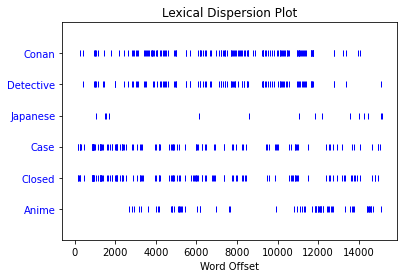

In [12]:
word_list = ['Conan','Detective','Japanese','Case','Closed','Anime']
tokens = nltk.word_tokenize(str(text))
mytext = nltk.Text(tokens)
mytext.dispersion_plot(word_list)

> - Explain in your own words what aspect of language *lexical diversity* describes.

Answer:
It indicated the diversity of words in this text. When a text owns more diversed words, the value of lexical diversity would be larger, as the number of unique words would be more closed to the length of the text.

> - Create frequency distributions for text2, including the cumulative frequency plot for the 75 most common words.

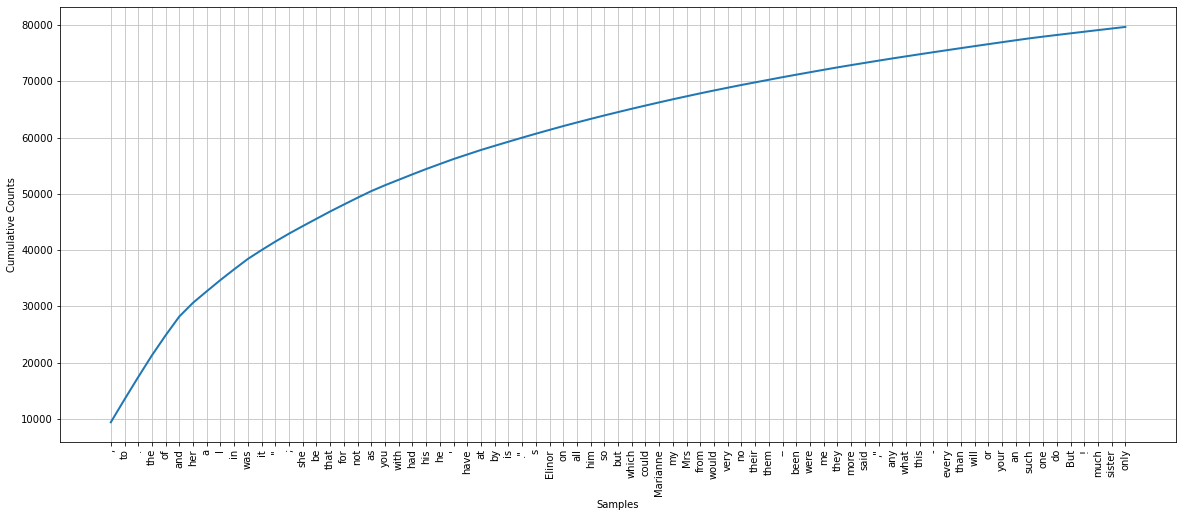

the number of words in text 2:141576


In [13]:
fdist2 = FreqDist(text2)
most_common_75 = fdist2.most_common(75)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
fdist2.plot(75, cumulative=True)
plt.show()
print('the number of words in text 2:{}'.format(len(text2)))

> - What is a bigram? How does it relate to collocations. Explain in your own words.

Answer:
Bigram is a function which could combine two neighboring words together. With this function, we could get the possible combining words and then by calculating the frequency, we will be able to get the possible collocations.

> - Work through ex 2-12 in NLPP's section 1.8.
>> 2. Given an alphabet of 26 letters, there are 26 to the power 10, or 26 ** 10, ten-letter strings we can form. That works out to 141167095653376. How many hundred-letter strings are possible?

Answer: 
That would be $26^{100} = 3142930641582938830174357788501626427282669988762475256374173175398995908420104023465432599069702289330964075081611719197835869803511992549376$ ,
which is a really huge number.


In [14]:
print('26 ** 100 = {}'.format(26**100))

26 ** 100 = 3142930641582938830174357788501626427282669988762475256374173175398995908420104023465432599069702289330964075081611719197835869803511992549376


>> 3. The Python multiplication operation can be applied to lists. What happens when you type ['Monty', 'Python'] * 20, or 3 * sent1?

Answer:
It would be a repeated list of the original one.

In [15]:
['Monty', 'Python'] * 20

['Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python']

In [16]:
sent1 = ['Call', 'me', 'Ishmael', '.']
3* sent1

['Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ishmael',
 '.']

>> 4. Review 1 on computing with language. How many words are there in text2? How many distinct words are there?

In [17]:
print('The number of words in text 2: {}\nThe number of distinct words in text2: {}'.format(len(text2),len(set(text2))))

The number of words in text 2: 141576
The number of distinct words in text2: 6833


>> 5. Compare the lexical diversity scores for humor and romance fiction in 1.1. Which genre is more lexically diverse?

Answer: 
**humor** is more lexically deversed. As we mentioned before, the more the value of *Lexical diversity*, the more lexical deversity.

>> 6. Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

Answer:
We could observe that the female characters seems to the lead the story. Also, we could guess that Elinor nad Edward is a couple, and Marianne and Willoughby is the other couple, considering the overlappingpart in the lexical dispersion plot.

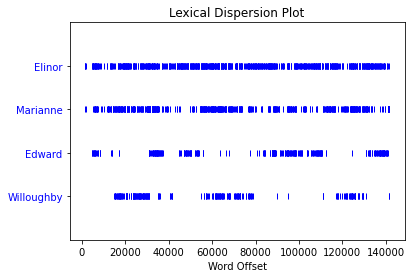

In [18]:
cha_list = ['Elinor', 'Marianne', 'Edward', 'Willoughby']
text2.dispersion_plot(cha_list)

>> 4. Find the collocations in text5.

In [19]:
text5.collocations()

wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time


>> 8. Consider the following Python expression: len(set(text4)). State the purpose of this expression. Describe the two steps involved in performing this computation.

This expression means to calculate the number of distinct words in text4. *set()* is the function which removes the repeated words, so after this step, all the words would be showed once. *len()* is the function which calculate the length of the specific object. So here, by *len()* we will be able to calculate the length of the distict word list of text4, which means to calculate the number of distict words in text4.

>> 9. Review 2 on lists and strings.
>> Define a string and assign it to a variable, e.g., my_string = 'My String' (but put something more interesting in the string). Print the contents of this variable in two ways, first by simply typing the variable name and pressing enter, then by using the print statement.
>> Try adding the string to itself using my_string + my_string, or multiplying it by a number, e.g., my_string * 3. Notice that the strings are joined together without any spaces. How could you fix this?

In [20]:
my_string = 'This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language.' 

In [21]:
my_string

'This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language.'

In [22]:
print(my_string)

This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language.


In [23]:
# strings join with space
print(" ".join([my_string]*3))

This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language. This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language. This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language.


>> 10. Define a variable my_sent to be a list of words, using the syntax my_sent = ["My", "sent"] (but with your own words, or a favorite saying).
>> Use ' '.join(my_sent) to convert this into a string.
>> Use split() to split the string back into the list form you had to start with.

In [24]:
my_sent = my_string.split(' ')
my_join = ' '.join(my_sent)
print('join sentence:\n{}'.format(my_join))
my_split = my_join.split(' ')
print('split parts:\n{}'.format(my_split))

join sentence:
This question is boring to be honest. It is actually for those who are not familar with python. This is a kind of torment for those who familar with this language.
split parts:
['This', 'question', 'is', 'boring', 'to', 'be', 'honest.', 'It', 'is', 'actually', 'for', 'those', 'who', 'are', 'not', 'familar', 'with', 'python.', 'This', 'is', 'a', 'kind', 'of', 'torment', 'for', 'those', 'who', 'familar', 'with', 'this', 'language.']


>> 11.Define several variables containing lists of words, e.g., phrase1, phrase2, and so on. Join them together in various combinations (using the plus operator) to form whole sentences. What is the relationship between len(phrase1 + phrase2) and len(phrase1) + len(phrase2)?

In [25]:
str1 = 'Define several variables containing lists of words'
str2 = 'What is the relationship between len'
phrase1 = str1.split(' ')
phrase2 = str2.split(' ')
print( len(phrase1 + phrase2) )
print( len(phrase1)+ len(phrase2) )

13
13


>> 12. Consider the following two expressions, which have the same value. Which one will typically be more relevant in NLP? Why?

Answer:  
The second one, because it represents with words, while the first one consider it as the whole string and extract the words with index of letters.

> - Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8.
>> 15. Review the discussion of conditionals in 4. Find all words in the Chat Corpus (text5) starting with the letter b. Show them in alphabetical order.

In [26]:
sorted(w for w in set(text5) if w.startswith('b'))

['b',
 'b-day',
 'b/c',
 'b4',
 'babay',
 'babble',
 'babblein',
 'babe',
 'babes',
 'babi',
 'babies',
 'babiess',
 'baby',
 'babycakeses',
 'bachelorette',
 'back',
 'backatchya',
 'backfrontsidewaysandallaroundtheworld',
 'backroom',
 'backup',
 'bacl',
 'bad',
 'bag',
 'bagel',
 'bagels',
 'bahahahaa',
 'bak',
 'baked',
 'balad',
 'balance',
 'balck',
 'ball',
 'ballin',
 'balls',
 'ban',
 'band',
 'bandito',
 'bandsaw',
 'banjoes',
 'banned',
 'baord',
 'bar',
 'barbie',
 'bare',
 'barely',
 'bares',
 'barfights',
 'barks',
 'barn',
 'barrel',
 'base',
 'bases',
 'basically',
 'basket',
 'battery',
 'bay',
 'bbbbbyyyyyyyeeeeeeeee',
 'bbiam',
 'bbl',
 'bbs',
 'bc',
 'be',
 'beach',
 'beachhhh',
 'beam',
 'beams',
 'beanbag',
 'beans',
 'bear',
 'bears',
 'beat',
 'beaten',
 'beatles',
 'beats',
 'beattles',
 'beautiful',
 'because',
 'beckley',
 'become',
 'bed',
 'bedford',
 'bedroom',
 'beeeeehave',
 'beeehave',
 'been',
 'beer',
 'before',
 'beg',
 'begin',
 'behave',
 'behind',

>> 17. Use text9.index() to find the index of the word sunset. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [34]:
sunset_index = text9.index('sunset')

# find the sentence
start, end = sunset_index , sunset_index
while text9[start] != '.':
    start -=1
while text9[end] != '.':
    end +=1

print(' '.join(text9[start+1:end+1]))

CHAPTER I THE TWO POETS OF SAFFRON PARK THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


>> 19. What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?
>>> sorted(set(w.lower() for w in text1))  
>>> sorted(w.lower() for w in set(text1))  

Answer:  
The first one will not contains any same words, while the second one might have. As the second line use the *lower* function after the *set* function， which means if two words are just different with captical pattern, such as 'Cake' and 'cake', both of them will remain and show as lower cases in the result. 

In [35]:
len(sorted(set(w.lower() for w in text1)))

17231

In [36]:
len(sorted(w.lower() for w in set(text1)))

19317

>> 22. Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

In [46]:
words_with_fourl = [w for w in text5 if len(w) == 4]
fdist = FreqDist(words_with_fourl)
fdist_sorted = sorted(fdist.items(),key = lambda item:item[1],reverse=True)
fdist_sorted

[('JOIN', 1021),
 ('PART', 1016),
 ('that', 274),
 ('what', 183),
 ('here', 181),
 ('....', 170),
 ('have', 164),
 ('like', 156),
 ('with', 152),
 ('chat', 142),
 ('your', 137),
 ('good', 130),
 ('just', 125),
 ('lmao', 107),
 ('know', 103),
 ('room', 98),
 ('from', 92),
 ('this', 86),
 ('well', 81),
 ('back', 78),
 ('hiya', 78),
 ('they', 77),
 ('dont', 75),
 ('yeah', 75),
 ('want', 71),
 ('love', 60),
 ('guys', 58),
 ('some', 58),
 ('been', 57),
 ('talk', 56),
 ('nice', 52),
 ('time', 50),
 ('when', 48),
 ('haha', 44),
 ('make', 44),
 ('girl', 43),
 ('need', 43),
 ('U122', 42),
 ('MODE', 41),
 ('will', 40),
 ('much', 40),
 ('then', 40),
 ('over', 39),
 ('work', 38),
 ('were', 38),
 ('take', 37),
 ('U121', 36),
 ('U115', 36),
 ('song', 36),
 ('even', 35),
 ('does', 35),
 ('seen', 35),
 ('U156', 35),
 ('U105', 35),
 ('more', 34),
 ('damn', 34),
 ('only', 33),
 ('come', 33),
 ('hell', 29),
 ('long', 28),
 ('them', 28),
 ('name', 27),
 ('tell', 27),
 ('away', 26),
 ('sure', 26),
 ('look'

>> 23. Review the discussion of looping with conditions in 4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

In [48]:
# uppercase_words_6 = [w for w in text6 if w.isupper()]
for w in text6:
    if w.isupper():
        print(w)

SCENE
KING
ARTHUR
SOLDIER
ARTHUR
I
SOLDIER
ARTHUR
I
I
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
ARTHUR
SOLDIER
A
ARTHUR
SOLDIER
A
ARTHUR
SOLDIER
ARTHUR
SOLDIER
I
ARTHUR
I
SOLDIER
SOLDIER
SOLDIER
I
ARTHUR
SOLDIER
SOLDIER
SOLDIER
SOLDIER
SOLDIER
SOLDIER
SOLDIER
SOLDIER
SCENE
CART
MASTER
CUSTOMER
CART
MASTER
DEAD
PERSON
I
CART
MASTER
CUSTOMER
DEAD
PERSON
I
CART
MASTER
CUSTOMER
DEAD
PERSON
I
CART
MASTER
CUSTOMER
DEAD
PERSON
I
CUSTOMER
CART
MASTER
I
DEAD
PERSON
I
CUSTOMER
CART
MASTER
I
DEAD
PERSON
I
CUSTOMER
CART
MASTER
I
CUSTOMER
CART
MASTER
I
CUSTOMER
CART
MASTER
DEAD
PERSON
I
I
CUSTOMER
DEAD
PERSON
I
I
CUSTOMER
CART
MASTER
CUSTOMER
CART
MASTER
I
CUSTOMER
CART
MASTER
SCENE
ARTHUR
DENNIS
ARTHUR
DENNIS
I
ARTHUR
I
DENNIS
I
I
ARTHUR
I
DENNIS
ARTHUR
I
DENNIS
ARTHUR
I
DENNIS
I
ARTHUR
I
DENNIS
WOMAN
ARTHUR
I
WOMAN
ARTHUR
WOMAN
ARTHUR
I
WOMAN
I
I
DENNIS
A
WOMAN
DENNIS
ARTHUR
I
WOMAN
ARTHUR
WOMAN
ARTHUR
DENNIS
I
ARTHUR
DENNIS
ARTHUR
I
DENNIS


>> 26.What does the following Python code do? sum(len(w) for w in text1) Can you use it to work out the average word length of a text?

Answer:  
This line caluculate the total letters in text1 (exclude the space, just the letters in words and symbols).  
You could get the averge word length by the following line:

In [49]:
avg_word_len = sum(len(w) for w in text1)/len(text1)
print('The average word length in text1 is {}'.format(avg_word_len))

The average word length in text1 is 3.830411128023649


>> 27. Define a function called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text.

In [51]:
def vocab_size(text):
    return len(set(word.lower() for word in text if word.isalpha()))

vocab_size(text1)

16948

>> 28.Define a function percent(word, text) that calculates how often a given word occurs in a text, and expresses the result as a percentage.

In [52]:
def percent(word,text):
    return 100 * text.count(word) / len(text)

percent('great',text1)

0.11233844160126372

## Part 3: Working with NLTK and other types of text
> Exercises: NLPP Chapter 2.
>
> Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8. As always, I recommend you write up your solutions nicely in a notebook.

> 4. ☼ Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

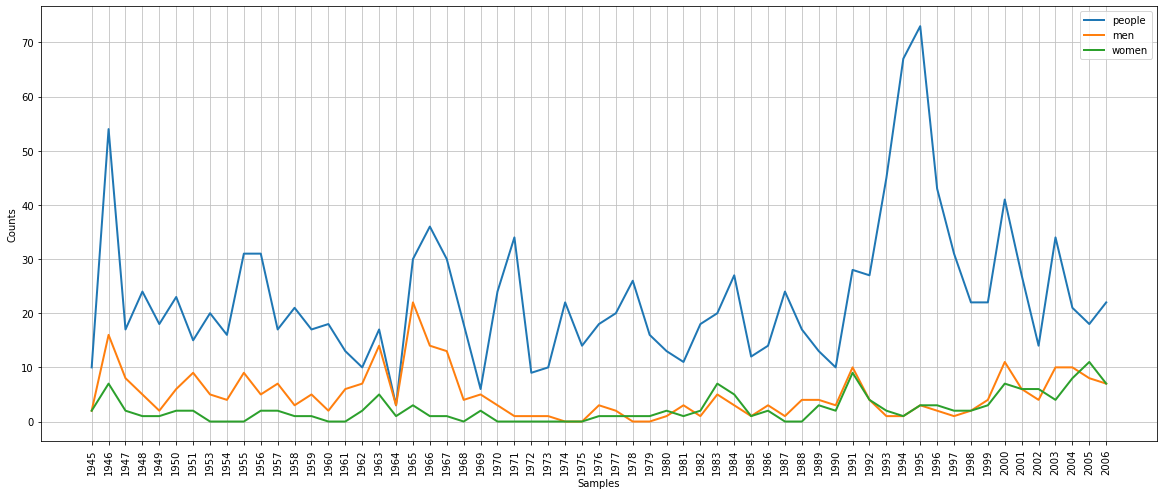

In [56]:
from nltk.corpus import state_union
docs = state_union.fileids()

import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in state_union.fileids()
    for w in state_union.words(fileid)
    for target in ['men', 'women','people']
    if w.lower().startswith(target))
cfd.plot()
plt.show()

> 8. ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

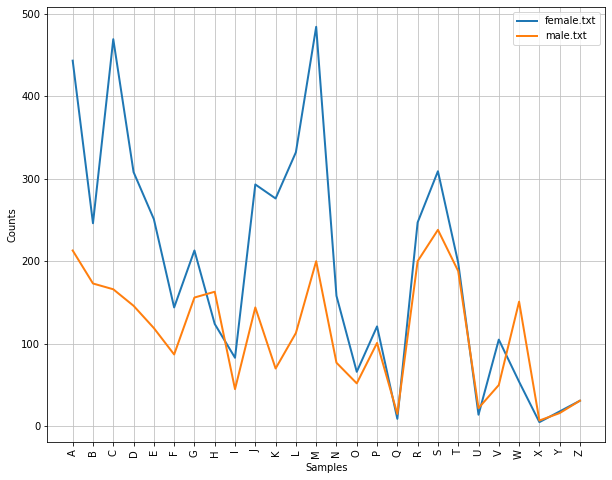

In [57]:
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')

plt.figure(figsize=(10,8))
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0]) # initial letter of a name
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()
plt.show()

> 11.Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

Answer:  
(what does 'look for other patterns' mean?)  
(impressionistic understanding: explain the table with real-world situation?)  
Try to use the Subject Pronouns as another closed classed of words.We could observe that, in 'government' category, the use of 'I' is less then 'we', while in other categories, situation is the opposite.

In [59]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


In [61]:
subject_pronouns = ['we','I','you','it','they','she','he']
cfd.tabulate(conditions=brown.categories(), samples=subject_pronouns)

                  we    I  you   it they  she   he 
      adventure   87  652  362  492  206  240  761 
 belles_lettres  398  845  188 1059  488  178 1174 
      editorial  167  201   83  386  148   41  268 
        fiction   85  511  236  458  230  280  813 
     government  112   97   74  218   92    0  120 
        hobbies  100  154  383  476  177   21  155 
          humor   32  239  131  162   70   58  146 
        learned  397  182   39  856  338   54  328 
           lore  132  265  209  566  303  232  541 
        mystery   62  583  340  515  106  219  670 
           news   77  179   55  363  205   42  451 
       religion  176  155  100  264  115   10  137 
        reviews   40   49   29  206   74   42  161 
        romance   78  951  456  573  168  496  702 
science_fiction   30   98   81  129   53   36  139 


> 15.Write a program to find all words that occur at least three times in the Brown Corpus.

In [68]:
from nltk.corpus import brown
fdist = nltk.FreqDist(w.lower() for w in brown.words())
more_than_3 = set([w for w in brown.words() if fdist[w] >=3])

In [69]:
more_than_3

{'triangular',
 'extends',
 'reply',
 'rococo',
 'service-connected',
 'stoneware',
 'boil',
 'bronchiole',
 'muted',
 'shot',
 'copper',
 'suffrage',
 'trilogy',
 'loosened',
 'witches',
 'farewell',
 'divide',
 'arithmetic',
 'territorial',
 'arroyo',
 'crafts',
 'stairway',
 '1949',
 'brass',
 'identities',
 'heritage',
 'door',
 'cracks',
 'one-room',
 'enrollment',
 'conceal',
 'probes',
 'seaman',
 'cherry',
 'so',
 'hydrogen',
 'marshes',
 'disturb',
 'specificity',
 'solicitude',
 'steam',
 '75,000',
 'widow',
 'frustration',
 '1812',
 'chili',
 'relatively',
 'gasket',
 'calibrated',
 'bravado',
 'powerless',
 'bitterness',
 'offensive',
 'shearing',
 'radiant',
 'coordinating',
 'tilted',
 'salts',
 'argue',
 "'61",
 'airports',
 'undertaken',
 'paso',
 'lace',
 'nostalgia',
 'solution',
 'inherent',
 'text-form',
 'mean',
 'broad',
 'fluent',
 'parasites',
 'sheets',
 'commercials',
 'coughing',
 'deduce',
 'bachelors',
 'ribs',
 'channeled',
 'grudges',
 'jam',
 'equally',


> 16.Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [81]:
texts = [brown.words(categories=c) for c in brown.categories()]
lexical_diver = [len(set(t))/len(t) for t in texts]

for cate in brown.categories():
    text = brown.words(categories=cate)
    lexical_diver = len(set(text))/len(text) 
    print('{}\t{:.4f}'.format(cate,lexical_diver))

# Ques: could we generate a table by 
# cfd = nltk.ConditionalFreqDist(
#     (genre, lexical_diversity)
#     for genre in brown.categories()
#     for lexical_diversity in len(set(brown.words(categories=genre)))/len(brown.words(categories=genre)))

# cfd.tabulate(conditions=genres)

adventure	0.1280
belles_lettres	0.1064
editorial	0.1605
fiction	0.1358
government	0.1167
hobbies	0.1449
humor	0.2313
learned	0.0927
lore	0.1315
mystery	0.1221
news	0.1431
religion	0.1618
reviews	0.2119
romance	0.1207
science_fiction	0.2234


Answer:

It is the 'learned' category. This category is corresponding to the book named 'Mosteller: Probability with Statistical Applications'. The result seems reasonable, as a text book might have a lot of repeated professional terms. In additon to that, it might avoid various description compared with other type of text.

> 17.Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [23]:
def most_fre_without_stopw(text,number_most_common=50):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text if w.lower() not in stopwords and w.isalnum()]
    word_freq = FreqDist(content)
    return word_freq.most_common(number_most_common)

most_fre_without_stopw(text5)

[('part', 1022),
 ('join', 1021),
 ('lol', 822),
 ('hi', 656),
 ('action', 347),
 ('hey', 292),
 ('u', 204),
 ('like', 160),
 ('im', 149),
 ('pm', 149),
 ('chat', 146),
 ('good', 132),
 ('lmao', 128),
 ('u7', 119),
 ('u34', 119),
 ('wanna', 110),
 ('ok', 106),
 ('know', 104),
 ('get', 104),
 ('room', 103),
 ('u35', 101),
 ('ya', 100),
 ('wb', 96),
 ('oh', 96),
 ('hello', 92),
 ('u18', 92),
 ('well', 91),
 ('one', 91),
 ('yes', 87),
 ('yeah', 85),
 ('hiya', 85),
 ('u30', 81),
 ('back', 79),
 ('u19', 79),
 ('see', 78),
 ('go', 77),
 ('dont', 77),
 ('u52', 77),
 ('u54', 73),
 ('ty', 72),
 ('want', 71),
 ('u37', 69),
 ('got', 68),
 ('everyone', 67),
 ('u28', 64),
 ('love', 63),
 ('anyone', 62),
 ('u3', 62),
 ('u31', 61),
 ('guys', 59)]

> 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [4]:
def most_fre_bigram(text,number_most_common=50):
    bigrams = nltk.bigrams(text)
            
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams_without_stopw = [(pair[0].lower(),pair[1].lower()) for pair in bigrams if pair[0].lower() not in stopwords and pair[1].lower() not in stopwords]
    # remove the punctuation marks
    bigrams_without_stopw_alnum = [pair for pair in bigrams_without_stopw if pair[0].isalnum() and pair[1].isalnum()]
    fred = nltk.FreqDist(bigrams_without_stopw_alnum) 
    return fred.most_common(number_most_common)

most_fre_bigram(text3)

[(('said', 'unto'), 178),
 (('thou', 'shalt'), 50),
 (('thou', 'hast'), 40),
 (('pray', 'thee'), 38),
 (('thy', 'seed'), 35),
 (('lord', 'god'), 29),
 (('unto', 'thee'), 29),
 (('ye', 'shall'), 28),
 (('spake', 'unto'), 28),
 (('god', 'said'), 26),
 (('thou', 'art'), 22),
 (('god', 'hath'), 21),
 (('years', 'old'), 21),
 (('thy', 'father'), 21),
 (('unto', 'joseph'), 21),
 (('let', 'us'), 20),
 (('shalt', 'thou'), 20),
 (('lord', 'said'), 18),
 (('begat', 'sons'), 17),
 (('unto', 'abraham'), 17),
 (('unto', 'jacob'), 17),
 (('shall', 'come'), 16),
 (('thy', 'servant'), 16),
 (('jacob', 'said'), 16),
 (('joseph', 'said'), 16),
 (('thy', 'brother'), 15),
 (('seven', 'years'), 15),
 (('unto', 'thy'), 15),
 (('lord', 'hath'), 14),
 (('every', 'man'), 14),
 (('unto', 'us'), 14),
 (('unto', 'pharaoh'), 13),
 (('thy', 'servants'), 13),
 (('every', 'living'), 12),
 (('hast', 'thou'), 12),
 (('thy', 'wife'), 12),
 (('every', 'beast'), 11),
 (('came', 'unto'), 11),
 (('bless', 'thee'), 11),
 (('

> Work through exercise 2.8.23 on Zipf's law. Zipf's law connects to a property of the Barabasi-Albert networks. Which one? Take a look at this article and write a paragraph or two describing other important instances of power-laws found on the internet.

Answer:
The property should be *preferential attachment*. 

>> 23.★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.  
**a.** Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?  
**b.** Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

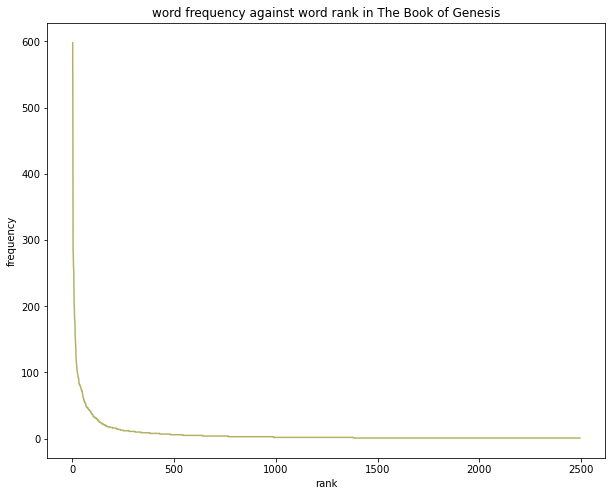

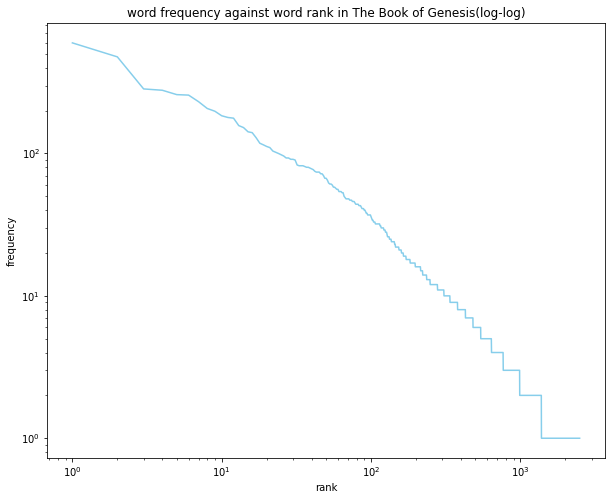

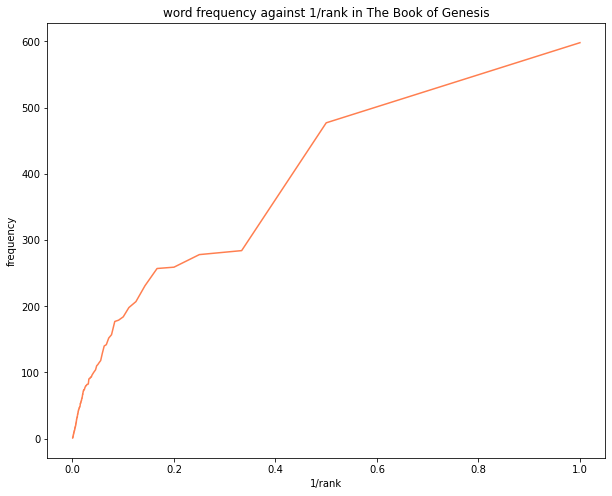

In [18]:
import numpy as np
def freq_rank_plot(text,name,show_number = 500):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text if w.lower() not in stopwords and w.isalnum()]
    word_freq = FreqDist(content)
    show_number =len(word_freq)
    rank = np.arange(1,show_number+1)
    freqs = [word_freq[pair] for pair in word_freq]
    freqs = freqs[:show_number]
    
    import matplotlib.pyplot as plt
    plt.figure(figsize = (10,8))
    plt.plot(rank,freqs,color = 'olive',alpha =0.6)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('word frequency against word rank in {}'.format(name))
    plt.show()
    
    # log-log
    plt.figure(figsize = (10,8))
    plt.loglog(rank,freqs,color = 'skyblue')
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.title('word frequency against word rank in {}(log-log)'.format(name))
    plt.show()
    
    # freq against (1/r)
    reverse_rank = [1/r for r in rank]
    plt.figure(figsize = (10,8))
    plt.plot(reverse_rank,freqs,color = 'coral')
    plt.xlabel('1/rank')
    plt.ylabel('frequency')
    plt.title('word frequency against 1/rank in {}'.format(name))
    plt.show()
    
    
    
freq_rank_plot(text3,text3.name)    

> What is going on at the extreme ends of the plotted line?

Answer:
The higher the rank is, the frequency is less. There will be a lots of words which only owns one occurance, that's what in the end of the log-log plot it shows the jagged shape.

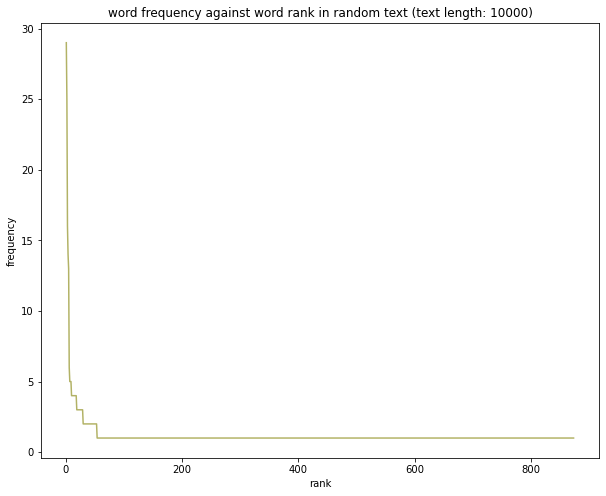

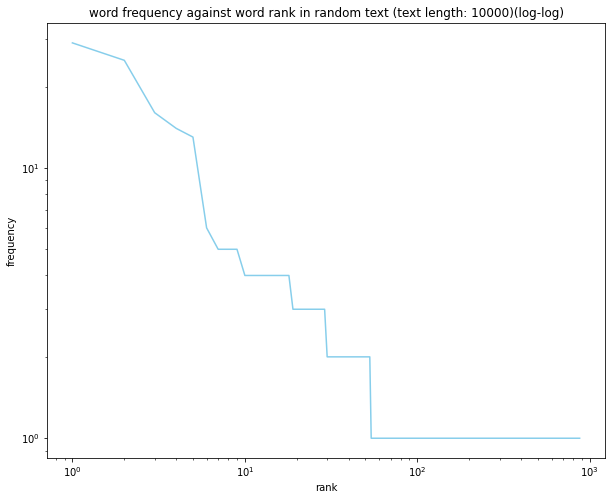

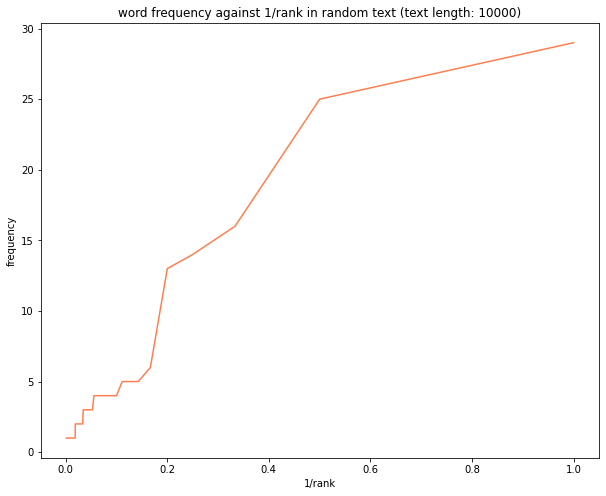

In [19]:
# Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. 
# You will need to import random first. 
import random
random_text = []
text_length = 10000
for i in range(text_length):
    random_text.append(random.choice("abcdefg "))

# Use the string concatenation operator to accumulate characters into a (very) long string. 
random_text = ''.join(random_text)

# Then tokenize this string, and generate the Zipf plot as before, and compare the two plots.
random_text = nltk.word_tokenize(random_text)
freq_rank_plot(random_text,'random text (text length: {})'.format(text_length))

# What do you make of Zipf's Law in the light of this?

